# Introduction

Data: I combined the data from Center for Systemic Peace and The World Bank. The data from the Center for Systemic Peace covered major episodes of political violence from1960 through 2012 (http://www.systemicpeace.org/inscrdata.html) and included the data on interstate, societal, and communal warfare magnitude scores (independence, interstate, ethnic, and civil; violence and warfare) for all countries. The World Bank data included selected world development indicators (1960-2012) by country, compiled from officially-recognized international sources (GDP per capita, trade, food index, research and development, tax revenue, preparatory school enrollment, primary school enrollment, gender ratio in schools).

Methodology: To measure conflict, I combined variables INTIND, INTVIOL, INTWAR, CIVVIOL, CIVWAR, ETHVIOL, and ETHWAR as described in the code book here: http://www.systemicpeace.org/inscr/MEPVcodebook2016.pdf
Next, I combined this variable confict with the measures of economy and the other economic indicators below for each country. To measure economy, I used GDP per capita and Trade. I also looked at the economic indicators such Food Index, Research and Development, Tax Revenue, Preparatory School Enrollment, Primary School Enrollment, and Gender Ratio in schools.

The project consists of two parts: 1) Presentation Main Method, 2) Case Studies and Cost of Conflict by Country. Presentation Main Method covers a set visualizations and regressions as well as estimations of cost of conflict for the entire World and for small-, medium-, and large-GDP countries. It also includes a roughly estimated cost of conflict for small-, medium-, and large-GDP countries as point increase in conflict for the economic indicators such as Trade, Food Index, Research and Development, Tax Revenue, Preparatory School Enrollment, Primary School Enrollment, and Gender Ratio in schools while controlling for time. Case Studies and Cost of Conflict by Country covers a set of visualization and very rough estimations of past cost of conflict for selected countries like Burundi, Liberia, Angola, China, Thailand and future cost of conflict for selected countries like Rwanda, Cambodia, Uganda, Mozambique, and Vietnam, Nigeria. 


In [1]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from linearmodels import PanelOLS
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Part 1: Presentation Main Method

In this part of the project, first, I looked at and visualized the effect of conflict on GPD per capita across entire globe. I ran a regression with conflict predicting GDP per capita for all countries while controlling for years. I also visualized scatter plot, trend line, and regression line of conflict predicting GDP for all countries.

Next, I divided my sample on small-, medium-, and large-GDP countries using tertiles and produced a set of visualizations (specifically time series plots) to see the differences in conflict and GDP per capita between small-, medium-, and large-GDP countries throughout the time. 

Finally, I produced a series of scatter plots and roughly estimated the cost of conflict for small-, medium-, and large-GDP countries as point increase in conflict for the economic indicators such as Trade, Food Index, Research and Development, Tax Revenue, Preparatory School Enrollment, Primary School Enrollment, and Gender Ratio in schools while controlling. For each point increase in conflict, there was either increase or decrease in the included economic indicators depending on the countries’ GDP size. I also controlled for time.


In [4]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6802 entries, 0 to 6801
Data columns (total 13 columns):
country_name          6802 non-null object
country_code          6802 non-null object
year                  6802 non-null int64
food_index            6578 non-null float64
gdp                   5955 non-null float64
gdp_capita            5952 non-null float64
rd                    895 non-null float64
school_enroll_prep    3672 non-null float64
school_enroll_prim    4947 non-null float64
school_gpi            3708 non-null float64
tax_rev               2694 non-null float64
trade                 5920 non-null float64
conflict              6745 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 690.9+ KB


In [5]:
# extracting GDP tertiles

df3=pd.qcut(data['gdp_capita'], 3)
df3.unique()



[NaN, (115.793, 1347.796], (1347.796, 6391.99], (6391.99, 113682.038]]
Categories (3, interval[float64]): [(115.793, 1347.796] < (1347.796, 6391.99] < (6391.99, 113682.038]]

In [6]:
# diving GDP into tertiles

def qsplit(gdp):
    if gdp < 1347.796:
        return "small"
    if gdp > 1347.796 and gdp < 6391.99:
        return "medium"
    if gdp > 6391.99:
        return "large"
    else:
        return np.nan

# data['gdp_size']=data.apply(lambda x: qsplit['gdp_capita'], axis=1)
data['gdp_size']=data["gdp_capita"].map(qsplit);



### Plotting conflict predicting GDP per capita across the Globe

Below, I looked at and visualized the effect of conflict on GPD per capita across entire globe. I ran a regression with conflict predicting GDP per capita for all countries while controlling for years. I also visualized scatter plot, trend line, and regression line of conflict predicting GDP for all countries.

In [7]:
# combing the data in a pivot table

df1=pd.pivot_table(data,index=['country_name','year'], values=['conflict', 'gdp_capita','trade']);
df1.reset_index(inplace=True)

x=df1['conflict']
y=df1['gdp_capita']

In [8]:
# running regression of conflict predicting gdp per capita while controlling for time

model2 = smf.ols(formula = 'gdp_capita ~ conflict+C(year)', data = df1).fit()
change=model2.params[53]/data['gdp_capita'].mean()

average_capita= df1['gdp_capita'].mean()
average_gdp= data['gdp'].mean()


print ('Average GDP per capita for the World: %.2f'% (average_capita))
print ('Average GDP for the World: %.2f'% (average_gdp))
print('Percentage change per 1 point in conflict the World: %.2f%%' % (100 * change))
print()
print()
print()
print(model2.summary())

Average GDP per capita for the World: 9955.16
Average GDP for the World: 278811928472.16
Percentage change per 1 point in conflict the World: -15.20%



                            OLS Regression Results                            
Dep. Variable:             gdp_capita   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     5.796
Date:                Wed, 09 May 2018   Prob (F-statistic):           2.52e-36
Time:                        13:45:13   Log-Likelihood:                -65567.
No. Observations:                5934   AIC:                         1.312e+05
Df Residuals:                    5880   BIC:                         1.316e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|

In [9]:
# building the trend line that will be plotted later

df=data.loc[data['conflict']==0]
df1=data.loc[data['conflict']==1]
df2=data.loc[data['conflict']==2]
df3=data.loc[data['conflict']==3]
df4=data.loc[data['conflict']==4]
df5=data.loc[data['conflict']==5]
df6=data.loc[data['conflict']==6]
df7=data.loc[data['conflict']==7]
df8=data.loc[data['conflict']==8]
df9=data.loc[data['conflict']==9]
df10=data.loc[data['conflict']==10]
df13=data.loc[data['conflict']==13]
df14=data.loc[data['conflict']==14]

x=[df['gdp_capita'].mean(),df1['gdp_capita'].mean(),df2['gdp_capita'].mean(),df3['gdp_capita'].mean(),\
  df4['gdp_capita'].mean(),df5['gdp_capita'].mean(),df6['gdp_capita'].mean(),df7['gdp_capita'].mean(),\
   df8['gdp_capita'].mean(),df9['gdp_capita'].mean(), df10['gdp_capita'].mean(),\
   df13['gdp_capita'].mean(),df14['gdp_capita'].mean()]
x
y=[0,1,2,3,4,5,6,7,8,9,10,13,14]
x

[11387.690660071225,
 4524.370104584001,
 7581.780926872688,
 4604.431065937327,
 2870.1930184064518,
 1643.6775793068375,
 2766.2958373308265,
 1971.76606358718,
 1399.674732477778,
 1506.8291351068963,
 462.07822304999996,
 2753.6328235,
 2907.657503666667]

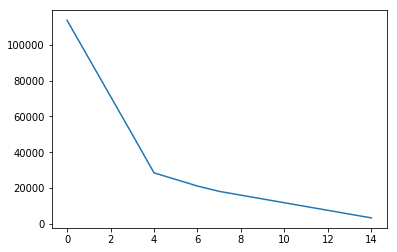

In [10]:
# continuing building the trend line

T = np.array([0,3,4,6,7,14])

power = np.array([df['gdp_capita'].max(),df3['gdp_capita'].max(),df4['gdp_capita'].max(),\
                  df6['gdp_capita'].max(),df7['gdp_capita'].max(),df14['gdp_capita'].max()])
plt.plot(T,power)
plt.show()

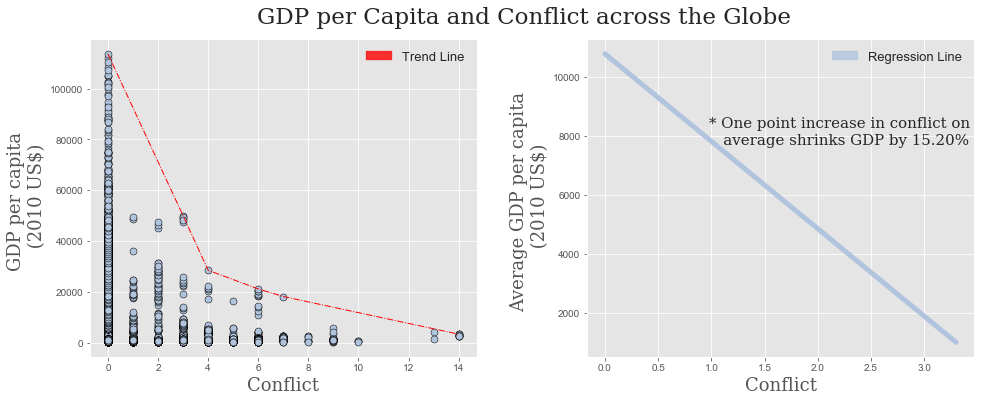

In [11]:
# plotting scatter plot, trend line, and regression line


plt.style.use('ggplot')
import seaborn as sns
import matplotlib.patches as mpatches
fig, axes = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(w_pad=8)
sns.set(font_scale=1.5)

plt.suptitle('GDP per Capita and Conflict across the Globe', fontsize=23, y=1.05,family="serif");

# ,edgecolor='k
axes[0].scatter(data['conflict'],data['gdp_capita'],\
               color='lightsteelblue', edgecolor='black',linewidths=.5)



axes[0].set_ylabel('GDP per capita \n (2010 US$)',fontsize=18, x=2,family="serif");
axes[0].set_xlabel('Conflict',fontsize=18,family="serif");
axes[0].plot(T,power, color='red',linestyle='-.',linewidth=1 )

red_patch = mpatches.Patch(color='red', label='Trend Line', alpha=.8)

axes[0].legend(handles=[red_patch], fontsize = 13,markerscale=3)





axes[1].plot([3.3, 0],[1000,10800], color='lightsteelblue',lw=5)
axes[1].set_ylabel('Average GDP per capita \n (2010 US$)',fontsize=18,family="serif");
axes[1].set_xlabel('Conflict',fontsize=18,family="serif");

axes[1].annotate('* One point increase in conflict on \n   average shrinks GDP by 15.20% ', (1,0),\
             (-265, 240), xycoords='axes fraction', textcoords='offset points',\
             va='top', fontsize = 15,family="serif")

blue_patch = mpatches.Patch(color='lightsteelblue', label='Regression Line', alpha=.8)

axes[1].legend(handles=[blue_patch], fontsize = 13,markerscale=3)
plt.show()

I divided my sample on small-, medium-, and large-GDP countries using tertiles and produced a set of visualizations to see the differences in conflict and GDP per capita between small-, medium-, and large-GDP countries.

In [12]:
# selecting small-GDP countries

df=data.loc[data['gdp_size']=="small"]

In [13]:
# prepare data frames to do plotting

df1=pd.pivot_table(df,index=['year'], values=['conflict', 'gdp_capita']);
df1.reset_index(inplace=True)


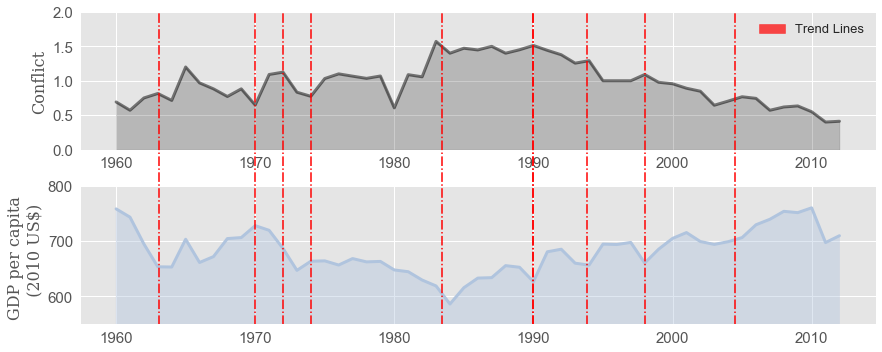

In [14]:
# plotting time series of conflict and gdp per capita for small-GDP countries to show how conflict and gdp per capita chnage through time

from matplotlib.transforms import blended_transform_factory

plt.style.use('ggplot')

df1.index = df1['year'];

fig, axes = plt.subplots(2,1, figsize=(12,5))
plt.tight_layout(h_pad=1)



axes[0].plot(df1.index,df1['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df1.index, df1['conflict'], color='black', alpha=.2)
axes[0].set_ylim([0, 2])
axes[0].set_ylabel('Conflict',fontsize=16,family="serif");

# axes[0].set_title('Conflict and GDP among Small-GDP Countries 1960-2012', fontsize=21, y=1.1,family="serif");
axes[1].plot(df1.index,df1['gdp_capita'], color='lightsteelblue',lw=3);
axes[1].set_ylabel('GDP per capita \n  (2010 US$)', fontsize=16,family="serif");
axes[1].fill_between(df1.index, df1['gdp_capita'], color='lightsteelblue', alpha=.4)
axes[1].set_ylim([550, 800])

red_patch = mpatches.Patch(color='red', label='Trend Lines', alpha=.7)

axes[0].legend(handles=[red_patch], fontsize = 13,markerscale=3)

trans = blended_transform_factory(axes[0].transAxes,axes[1].transAxes)
axes[1].plot([0.1, .1], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.22, .22], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.255, .255], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.29, .29], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.455, .455], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.57, .57], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.57, .57], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.637, .637], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.71, .71], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)
axes[1].plot([0.823, .823], [-.01,2.27 ], transform=trans, clip_on=False, color='red',linestyle='-.',linewidth=1.5)

In [15]:
# selecting medium-GDP countries

df=data.loc[data['gdp_size']=="medium"]

In [16]:
# prepare data frames to do plotting

df1=pd.pivot_table(df,index=['year'], values=['conflict', 'gdp_capita']);
df1.reset_index(inplace=True)

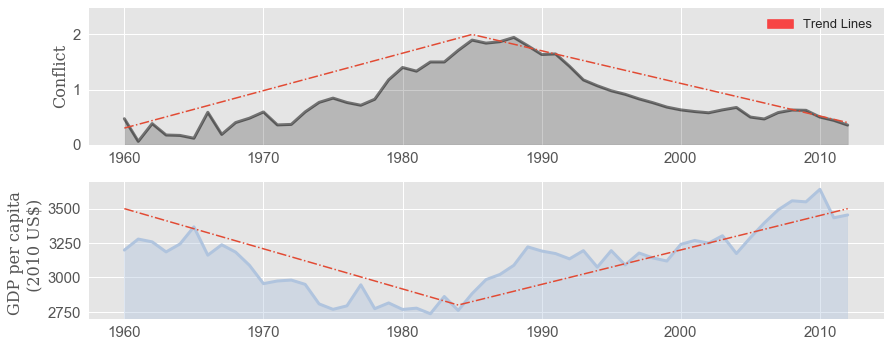

In [17]:
# plotting time series of conflict and gdp per capita for medium-GDP countries to show how conflict and gdp per capita chnage through time



plt.style.use('ggplot')

df1.index = df1['year'];

fig, axes = plt.subplots(2,1, figsize=(12,5))
plt.tight_layout(h_pad=1)

axes[0].plot(df1.index,df1['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df1.index, df1['conflict'], color='black', alpha=.2)
axes[0].set_ylim([0, 2.5])
axes[0].set_ylabel('Conflict',fontsize=16,family="serif");


red_patch = mpatches.Patch(color='red', label='Trend Lines', alpha=.7)

axes[0].legend(handles=[red_patch], fontsize = 13,markerscale=3)

axes[0].plot([df1.index[0],df1.index[25], df1.index[25],df1.index[52] ], [.3, 2,2,.4],lw=3, linestyle='-.',linewidth=1.5);

axes[1].plot(df1.index,df1['gdp_capita'], color='lightsteelblue',lw=3);
axes[1].fill_between(df1.index, df1['gdp_capita'], color='lightsteelblue', alpha=.4)
axes[1].set_ylim([2700, 3700])
axes[1].set_ylabel('GDP per capita \n  (2010 US$)', fontsize=16,family="serif");



axes[1].plot([df1.index[0],df1.index[24], df1.index[24],df1.index[52] ], [3500, 2800,2800,3500],lw=3, linestyle='-.',linewidth=1.5);



In [18]:
[df1.index[3], 0]

[1963, 0]

In [19]:
# selecting large-GDP countries
df=data.loc[data['gdp_size']=="large"]

In [20]:
# prepare data frames to do plotting

df1=pd.pivot_table(df,index=['year'], values=['conflict', 'gdp_capita']);
df1.reset_index(inplace=True)

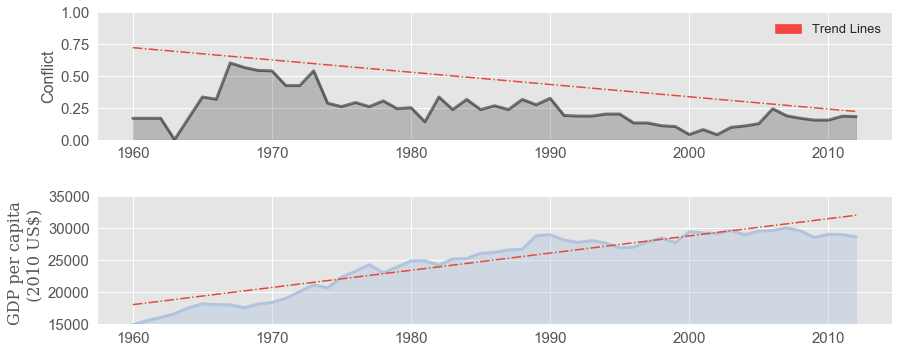

In [21]:
# plotting time series of conflict and gdp per capita for large-GDP countries to show how conflict and gdp per capita chnage through time

plt.style.use('ggplot')

df1.index = df1['year'];

fig, axes = plt.subplots(2,1, figsize=(12,5))
plt.tight_layout(h_pad=3)

axes[0].plot(df1.index,df1['conflict'], color='black',alpha=.5,lw=3);
axes[0].set_ylabel('Conflict',fontsize=16);
axes[0].fill_between(df1.index, df1['conflict'], color='black', alpha=.2)

axes[0].set_ylim([0, 1])
axes[0].plot([df1.index[0],df1.index[52]], [.72,0.22],lw=3, linestyle='-.',linewidth=1.5);

red_patch = mpatches.Patch(color='red', label='Trend Lines', alpha=.7)

axes[0].legend(handles=[red_patch], fontsize = 13,markerscale=3)


axes[1].plot(df1.index,df1['gdp_capita'], color='lightsteelblue',lw=3);
axes[1].set_ylabel('GDP per capita \n  (2010 US$)', fontsize=16,family="serif");
axes[1].fill_between(df1.index, df1['gdp_capita'], color='lightsteelblue', alpha=.4)
axes[1].set_ylim([15000, 35000])
axes[1].plot([df1.index[0],df1.index[52]], [18000, 32000],lw=3, linestyle='-.',linewidth=1.5);


In [22]:
# preparing data frames to plot time series comparison between small- and large-GDP countries

df1=data.loc[data['gdp_size']=="small"];
# df2=data.loc[data['gdp_size']=="medium"];
df3=data.loc[data['gdp_size']=="large"];
df1=pd.pivot_table(df1,index=['year'], values=['conflict', 'gdp_capita']);
df1.reset_index(inplace=True)
# df2=pd.pivot_table(df2,index=['year'], values=['conflict', 'gdp_capita']);
# df2.reset_index(inplace=True)
df3=pd.pivot_table(df3,index=['year'], values=['conflict', 'gdp_capita']);
df3.reset_index(inplace=True)

(0, 35000)

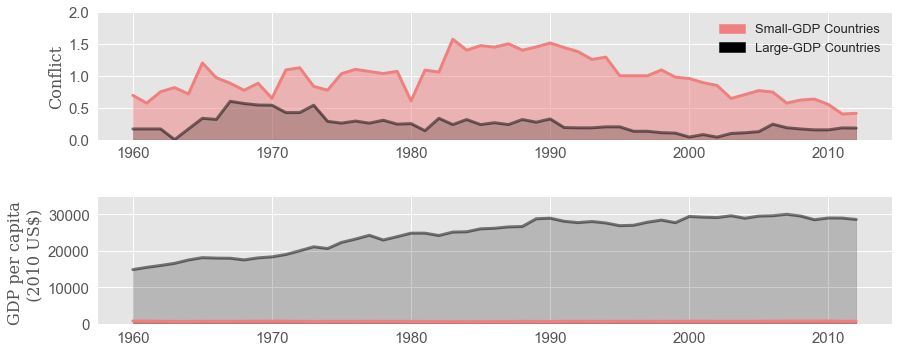

In [23]:
import matplotlib.patches as mpatches


plt.style.use('ggplot')

df1.index = df1['year'];
# df2.index = df2['year'];
df3.index = df3['year'];

fig, axes = plt.subplots(2,1, figsize=(12,5))
plt.tight_layout(h_pad=3)

axes[0].plot(df1.index,df1['conflict'], color='lightcoral',lw=3);

axes[0].plot(df3.index,df3['conflict'], color='black',alpha=.5,lw=3);
axes[0].fill_between(df1.index, df1['conflict'], color='lightcoral', alpha=.5)

axes[0].fill_between(df3.index, df3['conflict'], color='black', alpha=.2)
axes[0].set_ylabel('Conflict',fontsize=16,family='serif');

red_patch = mpatches.Patch(color='lightcoral', label='Small-GDP Countries')
blue_patch = mpatches.Patch(color='black', label='Large-GDP Countries')
axes[0].legend(handles=[red_patch, blue_patch], fontsize = 13,markerscale=3)
axes[0].set_ylim([0,2])

axes[1].plot(df1.index,df1['gdp_capita'], color='lightcoral',lw=3);

axes[1].plot(df3.index,df3['gdp_capita'], color='black',alpha=.5,lw=3);
axes[1].fill_between(df1.index, df1['gdp_capita'], color='lightcoral', alpha=.8)

axes[1].fill_between(df3.index, df3['gdp_capita'], color='black', alpha=.2)
axes[1].set_ylabel('GDP per capita \n  (2010 US$)', fontsize=16,family='serif');

axes[1].set_ylim([0, 35000])

Finally, I produced a series of scatter plots and roughly estimated the cost of conflict for small-, medium-, and large-GDP countries as point increase in conflict for the economic indicators such as Trade, Food Index, Research and Development, Tax Revenue, Preparatory School Enrollment, Primary School Enrollment, and Gender Ratio in schools while controlling for time. For each point increase in conflict, there was either increase or decrease in the included economic indicators. Please see the results below.

### Trade

(-0.4, 12)

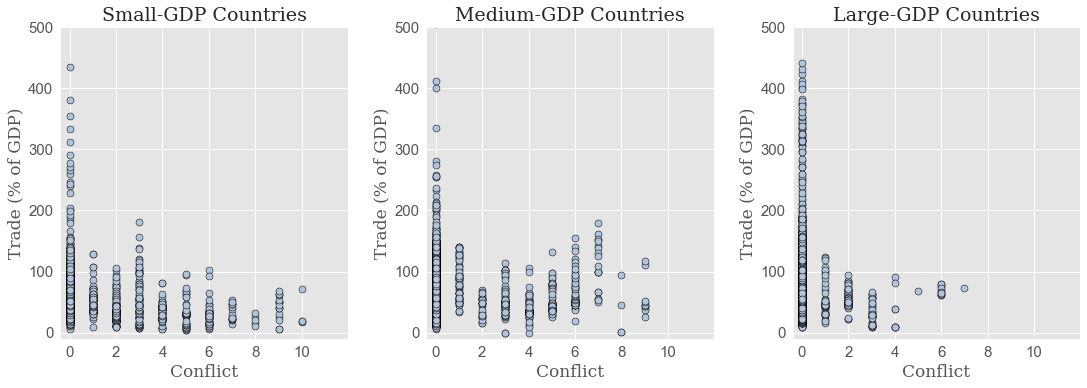

In [24]:
# plotting scatter plots of conflict predicting Trade for small-, medium-, and large-GDP countries 


plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=4)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
# dat1x=dat1[dat1['trade']<300]
axes[0].scatter( dat1['conflict'],dat1['trade'],\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[0].set_ylabel('Trade (% of GDP)',fontsize=17,family="serif");
axes[0].set_xlabel('Conflict',fontsize=17,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=19,family="serif");

axes[0].set_yticks(range(0,600, 100))
axes[0].set_xticks(range(0,12,2))
axes[0].set_ylim([-10, 500])
axes[0].set_xlim([-.4, 12])


dat2=data.loc[data['gdp_size']=="medium"]
# dat2x=dat2[dat2['trade']<300]
axes[1].scatter( dat2['conflict'],dat2['trade'],\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[1].set_ylabel('Trade (% of GDP)',fontsize=17,family="serif");
axes[1].set_xlabel('Conflict',fontsize=17,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=19,family="serif");
axes[1].set_yticks(range(0,600, 100))
axes[1].set_xticks(range(0,12,2))
axes[1].set_ylim([-10, 500])
axes[1].set_xlim([-.4, 12])


dat3=data.loc[data['gdp_size']=="large"]

axes[2].scatter( dat3['conflict'],dat3['trade'],\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('Trade (% of GDP)',fontsize=17,family="serif");
axes[2].set_xlabel('Conflict',fontsize=17,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");

axes[2].set_yticks(range(0,600, 100))
axes[2].set_xticks(range(0,12,2))
axes[2].set_ylim([-10, 500])
axes[2].set_xlim([-.4, 12])

In [25]:
# estimating change in Trade for small GDP countries as a percentage change per 1 point increase in conflict

model1 = smf.ols(formula = 'trade ~ conflict+C(year)', data = dat1).fit()
change=model1.params[53]/dat1['trade'].mean()
average=dat1['trade'].mean()
print ('Average trade for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * change))
print()
print()
print()
print(model1.summary())

Average trade for small GDP countries: 56.16
Percentage change per 1 point in conflict for small GDP countries: -7.99%



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     5.677
Date:                Wed, 09 May 2018   Prob (F-statistic):           5.76e-33
Time:                        13:45:37   Log-Likelihood:                -9076.5
No. Observations:                1843   AIC:                         1.826e+04
Df Residuals:                    1789   BIC:                         1.856e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----

In [26]:
# estimating change in Trade for medium GDP countries as a percentage change per 1 point increase in conflict

model2 = smf.ols(formula = 'trade ~ conflict+C(year)', data = dat2).fit()
change=model2.params[53]/dat2['trade'].mean()

average=dat2['trade'].mean()

print ('Average trade for medium GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * change))
print()
print()
print()
print(model2.summary())

Average trade for medium GDP countries: 78.30
Percentage change per 1 point in conflict for medium GDP countries: -5.13%



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     6.024
Date:                Wed, 09 May 2018   Prob (F-statistic):           6.06e-36
Time:                        13:45:38   Log-Likelihood:                -9770.7
No. Observations:                1913   AIC:                         1.965e+04
Df Residuals:                    1859   BIC:                         1.995e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--

In [27]:
# estimating change in Trade for large GDP countries as a percentage change per 1 point increase in conflict

model3 = smf.ols(formula = 'trade ~ conflict+C(year)', data = dat3).fit()
change=model3.params[53]/dat3['trade'].mean()
average=dat3['trade'].mean()

print ('Average trade for large GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for large GDP countries: %.2f%%' % (100 * change))
print()
print()
print()
print(model3.summary())



Average trade for large GDP countries: 80.97
Percentage change per 1 point in conflict for large GDP countries: -11.01%



                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.171
Date:                Wed, 09 May 2018   Prob (F-statistic):           3.78e-13
Time:                        13:45:39   Log-Likelihood:                -10710.
No. Observations:                1957   AIC:                         2.153e+04
Df Residuals:                    1903   BIC:                         2.183e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---

### Food Index 

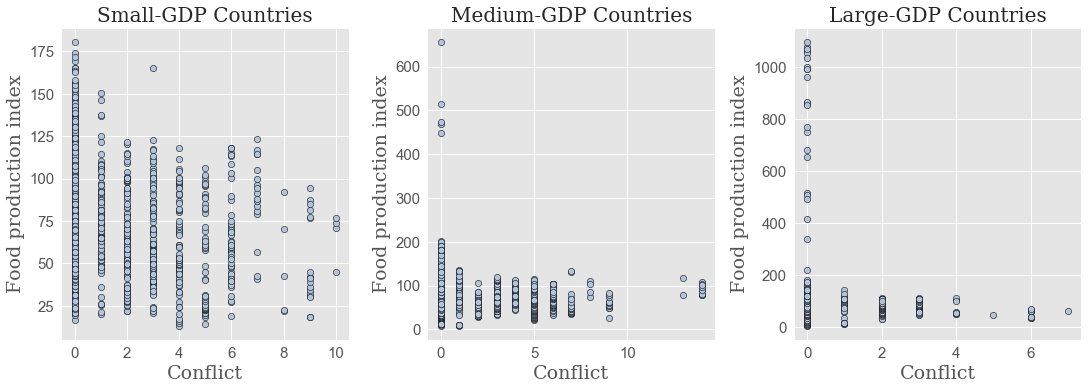

In [28]:
# plotting scatter plots of conflict predicting  Food Index for small-, medium-, and large-GDP countries 

plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=4)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]

# def outliers(conflict,food_index):
#     if conflict ==3 and food_index > 125:
#         return np.nan
#     else:
#         return food_index
# dat1['food_index']=dat1.apply(lambda x: outliers(x['conflict'],x['food_index']), axis=1)

axes[0].scatter( dat1['conflict'],dat1['food_index'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5)
axes[0].set_ylabel('Food production index',fontsize=19,family="serif");
axes[0].set_xlabel('Conflict',fontsize=19,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
# axes[0].set_xticks(range(0,12, 2))
# axes[0].set_yticks(range(0,1100,200))
# axes[0].set_xlim([-1, 12])
# axes[0].set_ylim([-10,1200])

dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['food_index'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5)
axes[1].set_ylabel('Food production index',fontsize=19,family="serif");
axes[1].set_xlabel('Conflict',fontsize=19,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
# axes[1].set_xticks(range(0,12, 2))
# axes[1].set_yticks(range(0,1100,200))
# axes[1].set_xlim([-1, 12])
# axes[1].set_ylim([-10,1200])

dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['food_index'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5)
axes[2].set_ylabel('Food production index',fontsize=19,family="serif");
axes[2].set_xlabel('Conflict',fontsize=19,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=20,family="serif");
# axes[2].set_xticks(range(0,12, 2))
# axes[2].set_yticks(range(0,1100,200))
# axes[2].set_xlim([-1, 12])
# axes[2].set_ylim([-10,1200])

In [29]:
# estimating change in Food Index for small-GDP countries as a percentage change per 1 point increase in conflict


model1 = smf.ols(formula = 'food_index ~ conflict+C(year)', data = dat1).fit()
import math 

change=model1.params[53]/dat1['food_index'].mean()
average=dat1['food_index'].mean()

print ('Average food production index for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model1.summary())


Average food production index for small GDP countries: 69.53
Percentage change per 1 point in conflict for small GDP countries: -1.20%



                            OLS Regression Results                            
Dep. Variable:             food_index   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     132.2
Date:                Wed, 09 May 2018   Prob (F-statistic):               0.00
Time:                        13:45:42   Log-Likelihood:                -7849.8
No. Observations:                1937   AIC:                         1.581e+04
Df Residuals:                    1884   BIC:                         1.610e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025 

In [30]:
# estimating change in Food Index for medium-GDP countries as a percentage change per 1 point increase in conflict

model2 = smf.ols(formula = 'food_index~ conflict+C(year)', data = dat2).fit()
import math 

change=model2.params[53]/dat2['food_index'].mean()
average=dat2['food_index'].mean()

print ('Average food production index for medium GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model2.summary())



Average food production index for medium GDP countries: 77.81
Percentage change per 1 point in conflict for medium GDP countries: -1.73%



                            OLS Regression Results                            
Dep. Variable:             food_index   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     17.75
Date:                Wed, 09 May 2018   Prob (F-statistic):          1.13e-126
Time:                        13:45:43   Log-Likelihood:                -9466.3
No. Observations:                1942   AIC:                         1.904e+04
Df Residuals:                    1889   BIC:                         1.933e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.02

In [31]:
# estimating change in Food Index for large-GDP countries as a percentage change per 1 point increase in conflict


model3 = smf.ols(formula = 'food_index~ conflict+C(year)', data = dat3).fit()
import math 

change=model3.params[53]/dat3['food_index'].mean()
average=dat3['food_index'].mean()

print ('Average food production index for large GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for large GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model3.summary())



Average food production index for large GDP countries: 97.42
Percentage change per 1 point in conflict for large GDP countries: -6.52%



                            OLS Regression Results                            
Dep. Variable:             food_index   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.7176
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.936
Time:                        13:45:44   Log-Likelihood:                -11101.
No. Observations:                1888   AIC:                         2.231e+04
Df Residuals:                    1835   BIC:                         2.260e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025 

### Food Index - Adjusted Scale

(-10, 1200)

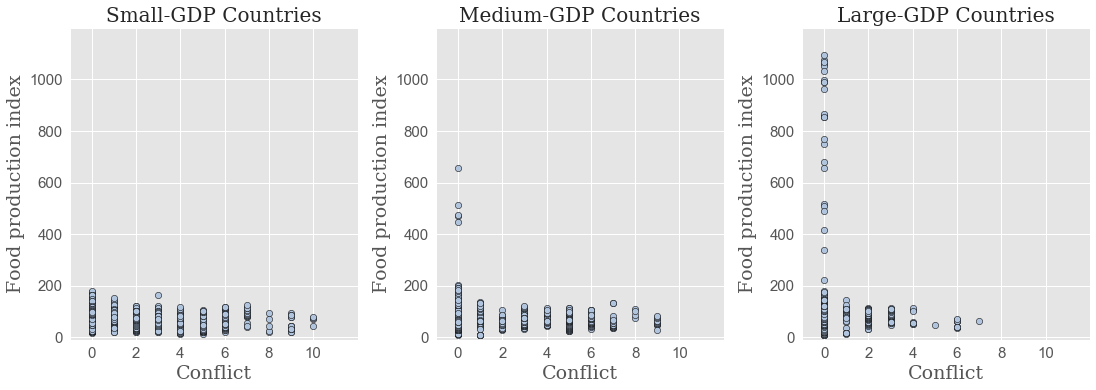

In [32]:
# plotting conflict predicting Food Index with adjusted scale (all three scatter plots having the same scale)

plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=4)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
# def outliers(conflict,food_index):
#     if conflict ==3 and food_index > 125:
#         return np.nan
#     else:
#         return food_index
# dat1['food_index']=dat1.apply(lambda x: outliers(x['conflict'],x['food_index']), axis=1)
axes[0].scatter( dat1['conflict'],dat1['food_index'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5)
axes[0].set_ylabel('Food production index',fontsize=19,family="serif");
axes[0].set_xlabel('Conflict',fontsize=19,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
axes[0].set_xticks(range(0,12, 2))
axes[0].set_yticks(range(0,1100,200))
axes[0].set_xlim([-1, 12])
axes[0].set_ylim([-10,1200])

dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['food_index'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5)
axes[1].set_ylabel('Food production index',fontsize=19,family="serif");
axes[1].set_xlabel('Conflict',fontsize=19,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
axes[1].set_xticks(range(0,12, 2))
axes[1].set_yticks(range(0,1100,200))
axes[1].set_xlim([-1, 12])
axes[1].set_ylim([-10,1200])

dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['food_index'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5)
axes[2].set_ylabel('Food production index',fontsize=19,family="serif");
axes[2].set_xlabel('Conflict',fontsize=19,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=20,family="serif");
axes[2].set_xticks(range(0,12, 2))
axes[2].set_yticks(range(0,1100,200))
axes[2].set_xlim([-1, 12])
axes[2].set_ylim([-10,1200])

### Research & Development

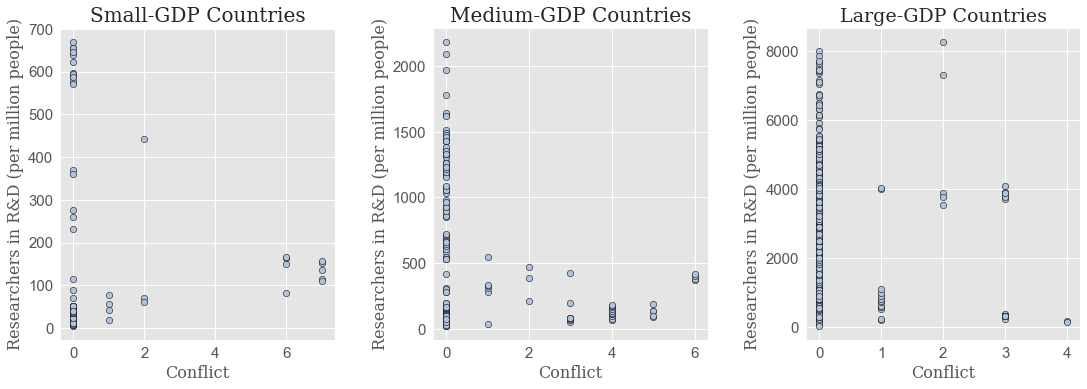

In [33]:
# plotting scatter plots of conflict predicting Research and Development for small-, medium-, and large-GDP countries 

plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
# def outliers1(conflict,RD):
#     if conflict ==2 and RD > 100:
#         return np.nan
#     else:
#         return RD

# dat1['rd']=dat1.apply(lambda x: outliers1(x['conflict'],x['rd']), axis=1)

axes[0].scatter( dat1['conflict'],dat1['rd'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[0].plot([13.5, 13.5], [0, 1.1], transform=trans, clip_on=False, color='k',\
#              linestyle='-.',linewidth=2)
axes[0].set_ylabel('Researchers in R&D (per million people)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
# axes[0].set_xticks(range(0,10,2))
# axes[0].set_yticks(range(0,8000, 1000))
# axes[0].set_xlim([-1, 10])
# axes[0].set_ylim([-200,8000])



dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['rd'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[1].plot([30.1, 30.1], [0, 1.1], transform=trans, clip_on=False, color='k')
axes[1].set_ylabel('Researchers in R&D (per million people)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
# axes[1].set_xticks(range(0,10,2))
# axes[1].set_yticks(range(0,8000, 1000))
# axes[1].set_xlim([-1, 10])
# axes[1].set_ylim([-200,8000])



dat3=data.loc[data['gdp_size']=="large"]
# def outliers2(conflict,RD):
#     if conflict ==2 and RD > 6000:
#         return np.nan
#     else:
#         return RD

# dat3['rd']=dat3.apply(lambda x: outliers2(x['conflict'],x['rd']), axis=1)
axes[2].scatter( dat3['conflict'],dat3['rd'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('Researchers in R&D (per million people)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
# axes[2].set_xticks(range(0,10,2))
# axes[2].set_yticks(range(0,8000, 1000))
# axes[2].set_xlim([-1, 10])
# axes[2].set_ylim([-200,8200])

In [34]:
# estimating change in R&D for small-GDP countries as a percentage change per 1 point increase in conflict


model1 = smf.ols(formula = 'rd ~ conflict+C(year)', data = dat1).fit()
import math 

change=math.ceil(abs(model1.params[53]))/dat1['rd'].mean()
average=dat1['rd'].mean()

print ('Average R&D index for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * (-change)))
print()
print()
print()
print(model1.summary())



Average R&D index for small GDP countries: 142.37
Percentage change per 1 point in conflict for small GDP countries: -0.70%



                            OLS Regression Results                            
Dep. Variable:                     rd   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                 -0.132
Method:                 Least Squares   F-statistic:                    0.3899
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.984
Time:                        13:45:49   Log-Likelihood:                -601.82
No. Observations:                  90   AIC:                             1240.
Df Residuals:                      72   BIC:                             1285.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]

In [35]:
# selecting variable to plot next graph
dat2=dat2[['rd','conflict','year']]



In [36]:
# estimating change in R&D for small-GDP countries as a percentage change per 1 point increase in conflict

model2 = smf.ols(formula = 'rd ~ conflict+C(year)', data = dat2).fit()
import math 

change=math.ceil(abs(model2.params[53]))/dat2['rd'].mean()
average=dat2['rd'].mean()

print ('Average R&D index for medium GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (-change)))
print()
print()
print()
print(model2.summary())



Average R&D index for medium GDP countries: 541.24
Percentage change per 1 point in conflict for medium GDP countries: -18.85%



                            OLS Regression Results                            
Dep. Variable:                     rd   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.742
Date:                Wed, 09 May 2018   Prob (F-statistic):             0.0403
Time:                        13:45:51   Log-Likelihood:                -1364.7
No. Observations:                 179   AIC:                             2765.
Df Residuals:                     161   BIC:                             2823.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.9

In [37]:
model3 = smf.ols(formula = 'rd ~ conflict+C(year)', data = dat3).fit()
import math 

change=model3.params[53]/dat3['rd'].mean()
average=dat3['rd'].mean()

print ('Average R&D index for medium GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model3.summary())



Average R&D index for medium GDP countries: 2545.02
Percentage change per 1 point in conflict for medium GDP countries: -12.61%



                            OLS Regression Results                            
Dep. Variable:                     rd   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.074
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.375
Time:                        13:45:52   Log-Likelihood:                -5571.0
No. Observations:                 626   AIC:                         1.118e+04
Df Residuals:                     608   BIC:                         1.126e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.

### Research  & Development  - Adjusted Scale

(-200, 8500)

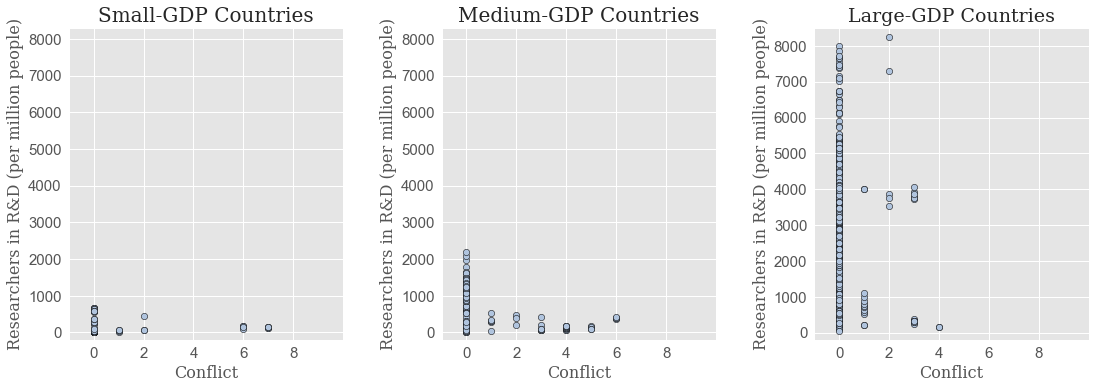

In [38]:
# plotting conflict predicting R&D with adjusted scale (all three scatter plots having the same scale)


plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
# def outliers1(conflict,RD):
#     if conflict ==2 and RD > 100:
#         return np.nan
#     else:
#         return RD

# dat1['rd']=dat1.apply(lambda x: outliers1(x['conflict'],x['rd']), axis=1)
axes[0].scatter( dat1['conflict'],dat1['rd'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[0].plot([13.5, 13.5], [0, 1.1], transform=trans, clip_on=False, color='k',\
#              linestyle='-.',linewidth=2)
axes[0].set_ylabel('Researchers in R&D (per million people)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
axes[0].set_xticks(range(0,10,2))
axes[0].set_yticks(range(0,8300, 1000))
axes[0].set_xlim([-1, 10])
axes[0].set_ylim([-200,8300])



dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['rd'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[1].plot([30.1, 30.1], [0, 1.1], transform=trans, clip_on=False, color='k')
axes[1].set_ylabel('Researchers in R&D (per million people)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
axes[1].set_xticks(range(0,10,2))
axes[1].set_yticks(range(0,8300, 1000))
axes[1].set_xlim([-1, 10])
axes[1].set_ylim([-200,8300])



dat3=data.loc[data['gdp_size']=="large"]
# def outliers2(conflict,RD):
#     if conflict ==2 and RD > 6000:
#         return np.nan
#     else:
#         return RD
# dat3['rd']=dat3.apply(lambda x: outliers2(x['conflict'],x['rd']), axis=1)
axes[2].scatter( dat3['conflict'],dat3['rd'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('Researchers in R&D (per million people)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
axes[2].set_xticks(range(0,10,2))
axes[2].set_yticks(range(0,8500, 1000))
axes[2].set_xlim([-1, 10])
axes[2].set_ylim([-200,8500])


### School Enrollment PREP - Adjusted Scale

(-1, 12)

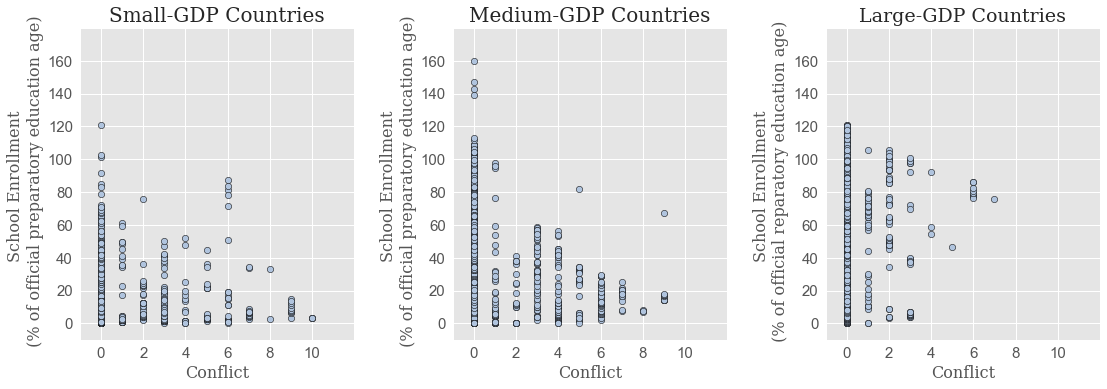

In [39]:
# plotting scatter plots of conflict predicting Prep School Enrollment for small-, medium-, and large-GDP countries  
# with adjusted scale (all three scatter plots having the same scale)


plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
axes[0].scatter( dat1['conflict'],dat1['school_enroll_prep'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[0].plot([13.5, 13.5], [0, 1.1], transform=trans, clip_on=False, color='k',\
#              linestyle='-.',linewidth=2)
axes[0].set_ylabel('School Enrollment \n (% of official preparatory education age)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
axes[0].set_yticks(range(0,180,20))
axes[0].set_xticks(range(0,12, 2))
axes[0].set_ylim([-10, 180])
axes[0].set_xlim([-1,12])



dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['school_enroll_prep'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[1].plot([30.1, 30.1], [0, 1.1], transform=trans, clip_on=False, color='k')
axes[1].set_ylabel('School Enrollment \n (% of official preparatory education age)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
axes[1].set_yticks(range(0,180,20))
axes[1].set_xticks(range(0,12, 2))
axes[1].set_ylim([-10, 180])
axes[1].set_xlim([-1,12])



dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['school_enroll_prep'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('School Enrollment \n (% of official reparatory education age)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
axes[2].set_yticks(range(0,180,20))
axes[2].set_xticks(range(0,12, 2))
axes[2].set_ylim([-10, 180])
axes[2].set_xlim([-1,12])

School Enrollment can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition (http://www.nationmaster.com/country-info/stats/Education/School-enrollment%2C-primary/%25-gross)

In [40]:
# estimating change in Prep School Enrollement for small-GDP countries as a percentage change per 1 point increase in conflict


model1 = smf.ols(formula = 'school_enroll_prep ~ conflict+C(year)', data = dat1).fit()
import math 

change=model1.params[53]/dat1['school_enroll_prep'].mean()
average=dat1['school_enroll_prep'].mean()

print ('Average prep scholl enrollment index for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model1.summary())



Average prep scholl enrollment index for small GDP countries: 15.06
Percentage change per 1 point in conflict for small GDP countries: 0.94%



                            OLS Regression Results                            
Dep. Variable:     school_enroll_prep   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.773
Date:                Wed, 09 May 2018   Prob (F-statistic):            0.00204
Time:                        13:45:57   Log-Likelihood:                -3291.8
No. Observations:                 765   AIC:                             6672.
Df Residuals:                     721   BIC:                             6876.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [

In [41]:
# estimating change in Prep School Enrollement for medium-GDP countries as a percentage change per 1 point increase in conflict


model2 = smf.ols(formula = 'school_enroll_prep ~ conflict+C(year)', data = dat2).fit()
import math 

change=model2.params[53]/dat2['school_enroll_prep'].mean()
average=dat2['school_enroll_prep'].mean()

print ('Average prep scholl enrollment index for medium GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model2.summary())



Average prep scholl enrollment index for medium GDP countries: 38.89
Percentage change per 1 point in conflict for medium GDP countries: -8.79%



                            OLS Regression Results                            
Dep. Variable:     school_enroll_prep   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     11.49
Date:                Wed, 09 May 2018   Prob (F-statistic):           2.11e-63
Time:                        13:45:59   Log-Likelihood:                -5697.4
No. Observations:                1238   AIC:                         1.148e+04
Df Residuals:                    1194   BIC:                         1.171e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|    

In [43]:
# estimating change in Prep School Enrollement for large-GDP countries as a percentage change per 1 point increase in conflict


import math
model3 = smf.ols(formula = 'school_enroll_prep ~ conflict+C(year)', data = dat3).fit()
change=model3.params[53]/dat3['school_enroll_prep'].mean()
average=dat3['school_enroll_prep'].mean()
print ('Average prep scholl enrollment index for large GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for large GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model3.summary())



Average prep scholl enrollment index for large GDP countries: 68.81
Percentage change per 1 point in conflict for large GDP countries: -3.18%



                            OLS Regression Results                            
Dep. Variable:     school_enroll_prep   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.456
Date:                Wed, 09 May 2018   Prob (F-statistic):           1.12e-12
Time:                        13:46:31   Log-Likelihood:                -6518.9
No. Observations:                1390   AIC:                         1.313e+04
Df Residuals:                    1346   BIC:                         1.336e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      

### School Enrollment PRIMARY - Adjusted Scale

(-1, 12)

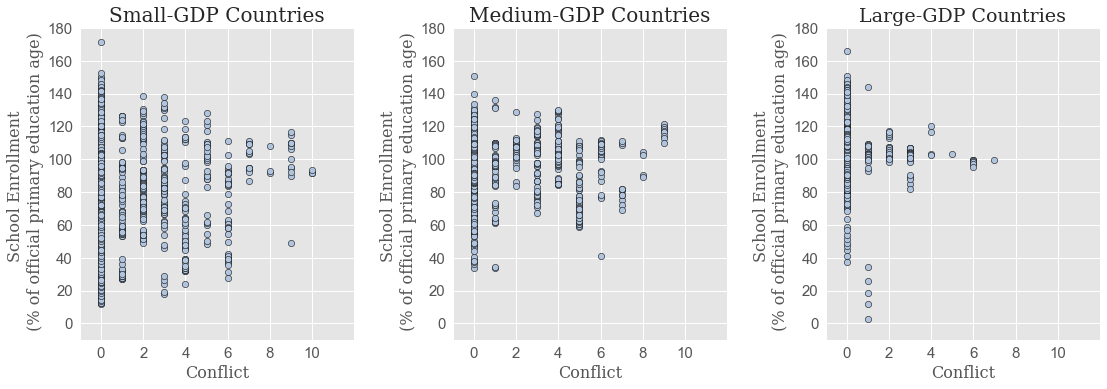

In [44]:
# plotting scatter plots of conflict predicting Primary School Enrollment for small-, medium-, and large-GDP countries  
# with adjusted scale (all three scatter plots having the same scale)

plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
axes[0].scatter( dat1['conflict'],dat1['school_enroll_prim'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[0].plot([13.5, 13.5], [0, 1.1], transform=trans, clip_on=False, color='k',\
#              linestyle='-.',linewidth=2)
axes[0].set_ylabel('School Enrollment \n (% of official primary education age)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
axes[0].set_yticks(range(0,220,20))
axes[0].set_xticks(range(0,12, 2))
axes[0].set_ylim([-10, 180])
axes[0].set_xlim([-1,12])



dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['school_enroll_prim'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[1].plot([30.1, 30.1], [0, 1.1], transform=trans, clip_on=False, color='k')
axes[1].set_ylabel('School Enrollment \n (% of official primary education age)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
axes[1].set_yticks(range(0,220,20))
axes[1].set_xticks(range(0,12, 2))
axes[1].set_ylim([-10, 180])
axes[1].set_xlim([-1,12])



dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['school_enroll_prim'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('School Enrollment \n (% of official primary education age)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
axes[2].set_yticks(range(0,220,20))
axes[2].set_xticks(range(0,12, 2))
axes[2].set_ylim([-10, 180])
axes[2].set_xlim([-1,12])

In [45]:
# estimating change in Primary School Enrollment for small-GDP countries as a percentage change per 1 point increase in conflict


import math 
model1 = smf.ols(formula = 'school_enroll_prim~ conflict+C(year)', data = dat1).fit()
change=model1.params[1]/dat1['school_enroll_prim'].mean()
average=dat1['school_enroll_prim'].mean()

print ('Average primary scholl enrollment index for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model1.summary())

Average primary scholl enrollment index for small GDP countries: 80.25
Percentage change per 1 point in conflict for small GDP countries: 0.00%



                            OLS Regression Results                            
Dep. Variable:     school_enroll_prim   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     7.306
Date:                Wed, 09 May 2018   Prob (F-statistic):           7.31e-38
Time:                        13:46:35   Log-Likelihood:                -6746.0
No. Observations:                1431   AIC:                         1.358e+04
Df Residuals:                    1387   BIC:                         1.381e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|    

In [46]:
# estimating change in Primary School Enrollment for medium-GDP countries as a percentage change per 1 point increase in conflict


import math 
model2 = smf.ols(formula = 'school_enroll_prim~ conflict+C(year)', data = dat2).fit()
change=model2.params[53]/dat2['school_enroll_prim'].mean()
average=dat2['school_enroll_prim'].mean()

print ('Average primary scholl enrollment index for mediumn GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model2.summary())

Average primary scholl enrollment index for mediumn GDP countries: 100.89
Percentage change per 1 point in conflict for medium GDP countries: -0.25%



                            OLS Regression Results                            
Dep. Variable:     school_enroll_prim   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.911
Date:                Wed, 09 May 2018   Prob (F-statistic):           1.83e-09
Time:                        13:46:36   Log-Likelihood:                -6257.0
No. Observations:                1535   AIC:                         1.260e+04
Df Residuals:                    1491   BIC:                         1.284e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t

In [47]:
# estimating change in Primary School Enrollment for large-GDP countries as a percentage change per 1 point increase in conflict


import math 
model3 = smf.ols(formula = 'school_enroll_prim~ conflict+C(year)', data = dat3).fit()
change=model3.params[53]/dat3['school_enroll_prim'].mean()
average=dat3['school_enroll_prim'].mean()

print ('Average primary scholl enrollment index for large GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for large GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model3.summary())

Average primary scholl enrollment index for large GDP countries: 103.00
Percentage change per 1 point in conflict for large GDP countries: -0.44%



                            OLS Regression Results                            
Dep. Variable:     school_enroll_prim   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.4504
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.999
Time:                        13:46:37   Log-Likelihood:                -6134.2
No. Observations:                1577   AIC:                         1.236e+04
Df Residuals:                    1533   BIC:                         1.259e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|  

### Gender ratio enrolled in schools

(-1, 12)

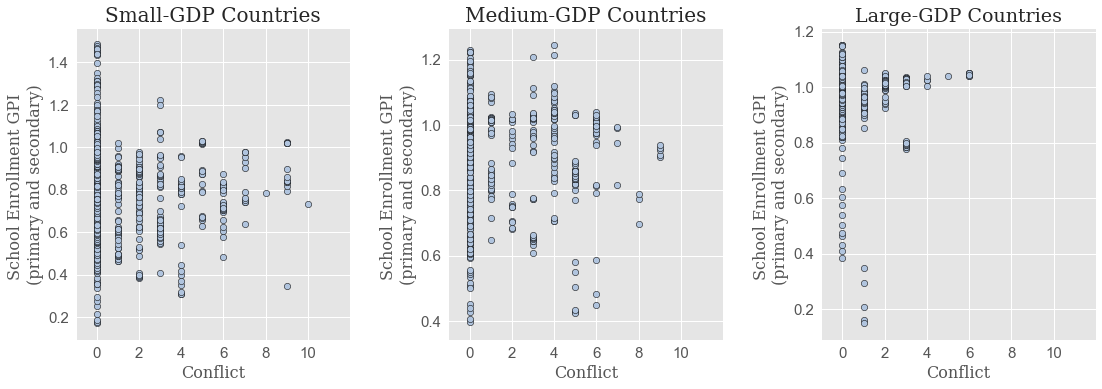

In [48]:
# plotting scatter plots of conflict predicting Gender Ratio in Schools for small-, medium-, and large-GDP countries 


plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
axes[0].scatter( dat1['conflict'],dat1['school_gpi'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[0].plot([13.5, 13.5], [0, 1.1], transform=trans, clip_on=False, color='k',\
#              linestyle='-.',linewidth=2)
axes[0].set_ylabel('School Enrollment GPI \n(primary and secondary)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
# axes[0].set_yticks(np.arange(0,1.6,2e-01))
axes[0].set_xticks(range(0,12, 2))
# axes[0].set_ylim([0, 1.6])
axes[0].set_xlim([-1,12])



dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['school_gpi'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[1].plot([30.1, 30.1], [0, 1.1], transform=trans, clip_on=False, color='k')
axes[1].set_ylabel('School Enrollment GPI \n(primary and secondary)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
# axes[1].set_yticks(np.arange(0,1.6,2e-01))
axes[1].set_xticks(range(0,12, 2))
# axes[1].set_ylim([0, 1.6])
axes[1].set_xlim([-1,12])



dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['school_gpi'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('School Enrollment GPI \n(primary and secondary)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
# axes[2].set_yticks(np.arange(0,1.6,2e-01))
axes[2].set_xticks(range(0,12, 2))
# axes[2].set_ylim([0, 1.6])
axes[2].set_xlim([-1,12])

In [49]:
# estimating change in Gender Ratio Enrollment for small-GDP countries as a percentage change per 1 point increase in conflict

import math 
model1 = smf.ols(formula = 'school_gpi ~ conflict+C(year)', data = dat1).fit()
change=model1.params[53]/dat1['school_gpi'].mean()
average=dat1['school_gpi'].mean()

print ('Average scholl enrollment GPI index for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model1.summary())


Average scholl enrollment GPI index for small GDP countries: 0.77
Percentage change per 1 point in conflict for small GDP countries: 0.10%



                            OLS Regression Results                            
Dep. Variable:             school_gpi   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     4.088
Date:                Wed, 09 May 2018   Prob (F-statistic):           4.44e-16
Time:                        13:46:40   Log-Likelihood:                 234.98
No. Observations:                 957   AIC:                            -382.0
Df Residuals:                     913   BIC:                            -168.0
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.

In [50]:
# estimating change in Gender Ration Enrollment for medium-GDP countries as a percentage change per 1 point increase in conflict


import math 
model2 = smf.ols(formula = 'school_gpi ~ conflict+C(year)', data = dat2).fit()
change=model2.params[53]/dat2['school_gpi'].mean()
average=dat2['school_gpi'].mean()

print ('Average scholl enrollment GPI index for medium  GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model2.summary())

Average scholl enrollment GPI index for medium  GDP countries: 0.95
Percentage change per 1 point in conflict for medium GDP countries: -1.12%



                            OLS Regression Results                            
Dep. Variable:             school_gpi   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5.331
Date:                Wed, 09 May 2018   Prob (F-statistic):           4.54e-24
Time:                        13:46:41   Log-Likelihood:                 832.83
No. Observations:                1093   AIC:                            -1578.
Df Residuals:                    1049   BIC:                            -1358.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|     

In [51]:
# estimating change in Gender Ratio Enrollment for large-GDP countries as a percentage change per 1 point increase in conflict

import math 
model3 = smf.ols(formula = 'school_gpi ~ conflict+C(year)', data = dat3).fit()
change=model3.params[53]/dat3['school_gpi'].mean()
average=dat3['school_gpi'].mean()

print ('Average scholl enrollment GPI index for large GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for large GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model3.summary())

Average scholl enrollment GPI index for large GDP countries: 0.99
Percentage change per 1 point in conflict for large GDP countries: -0.32%



                            OLS Regression Results                            
Dep. Variable:             school_gpi   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.120
Date:                Wed, 09 May 2018   Prob (F-statistic):           4.05e-05
Time:                        13:46:42   Log-Likelihood:                 1649.0
No. Observations:                1403   AIC:                            -3210.
Df Residuals:                    1359   BIC:                            -2979.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0

### Gender ratio enrolled in schools - Adjusted Scale

(-1, 12)

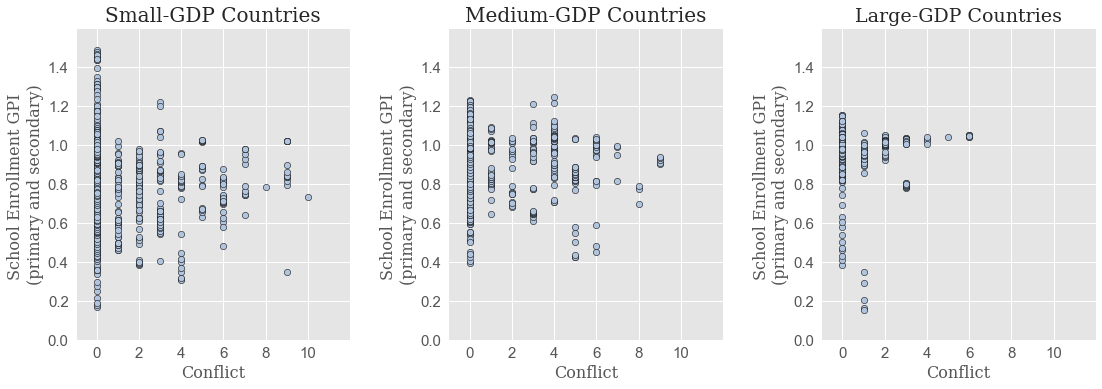

In [52]:
# plotting scatter plots of conflict predicting Gender Ratio Enrollment for small-, medium-, and large-GDP countries  
# with adjusted scale (all three scatter plots having the same scale)


plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
axes[0].scatter( dat1['conflict'],dat1['school_gpi'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[0].plot([13.5, 13.5], [0, 1.1], transform=trans, clip_on=False, color='k',\
#              linestyle='-.',linewidth=2)
axes[0].set_ylabel('School Enrollment GPI \n(primary and secondary)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
axes[0].set_yticks(np.arange(0,1.6,2e-01))
axes[0].set_xticks(range(0,12, 2))
axes[0].set_ylim([0, 1.6])
axes[0].set_xlim([-1,12])



dat2=data.loc[data['gdp_size']=="medium"]
axes[1].scatter( dat2['conflict'],dat2['school_gpi'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
# axes[1].plot([30.1, 30.1], [0, 1.1], transform=trans, clip_on=False, color='k')
axes[1].set_ylabel('School Enrollment GPI \n(primary and secondary)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
axes[1].set_yticks(np.arange(0,1.6,2e-01))
axes[1].set_xticks(range(0,12, 2))
axes[1].set_ylim([0, 1.6])
axes[1].set_xlim([-1,12])



dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['school_gpi'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('School Enrollment GPI \n(primary and secondary)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
axes[2].set_yticks(np.arange(0,1.6,2e-01))
axes[2].set_xticks(range(0,12, 2))
axes[2].set_ylim([0, 1.6])
axes[2].set_xlim([-1,12])

### Tax Revenue

(-1, 12)

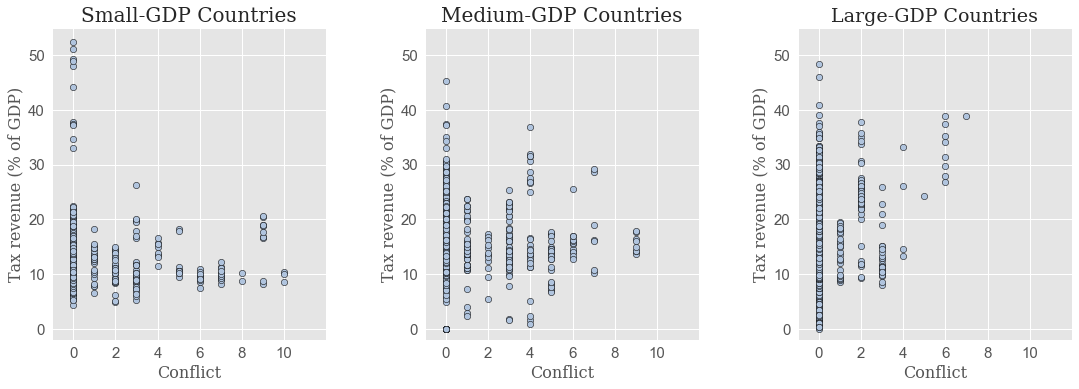

In [53]:
# plotting scatter plots of conflict predicting Tax Revenue for small-, medium-, and large-GDP countries 


plt.style.use('ggplot')

fig, axes = plt.subplots(1,3, figsize=(15,5))
plt.tight_layout(w_pad=6)
sns.set(font_scale=1.5)


dat1=data.loc[data['gdp_size']=="small"]
# dat1x=dat1[dat1['tax_rev']<60]
axes[0].scatter( dat1['conflict'],dat1['tax_rev'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')

axes[0].set_ylabel('Tax revenue (% of GDP)',fontsize=16,family="serif");
axes[0].set_xlabel('Conflict',fontsize=16,family="serif");
axes[0].set_title('Small-GDP Countries',fontsize=20,family="serif");
axes[0].set_yticks(np.arange(0,55,10))
axes[0].set_xticks(range(0,12, 2))
axes[0].set_ylim([-2, 55])
axes[0].set_xlim([-1,12])



dat2=data.loc[data['gdp_size']=="medium"]
# dat2x=dat2[dat2['tax_rev']<45]
axes[1].scatter( dat2['conflict'],dat2['tax_rev'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[1].set_ylabel('Tax revenue (% of GDP)',fontsize=16,family="serif");
axes[1].set_xlabel('Conflict',fontsize=16,family="serif");
axes[1].set_title('Medium-GDP Countries',fontsize=20,family="serif");
axes[1].set_yticks(np.arange(0,55,10))
axes[1].set_xticks(range(0,12, 2))
axes[1].set_ylim([-2, 55])
axes[1].set_xlim([-1,12])



dat3=data.loc[data['gdp_size']=="large"]
axes[2].scatter( dat3['conflict'],dat3['tax_rev'],s=40,\
                color='lightsteelblue',edgecolor='black',linewidths=.5,marker='o')
axes[2].set_ylabel('Tax revenue (% of GDP)',fontsize=16,family="serif");
axes[2].set_xlabel('Conflict',fontsize=16,family="serif");
axes[2].set_title('Large-GDP Countries',fontsize=19,family="serif");
axes[2].set_yticks(np.arange(0,55,10))
axes[2].set_xticks(range(0,12, 2))
axes[2].set_ylim([-2, 55])
axes[2].set_xlim([-1,12])

In [54]:
# estimating change in Tax Revenue for small-GDP countries as a percentage change per 1 point increase in conflict


import math 
model1 = smf.ols(formula = 'tax_rev ~ conflict+C(year)', data = dat1).fit()
change=model1.params[53]/dat1['tax_rev'].mean()
average=dat1['tax_rev'].mean()

print ('Average tax revenue  for small GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for small GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model1.summary())

Average tax revenue  for small GDP countries: 13.43
Percentage change per 1 point in conflict for small GDP countries: -3.31%



                            OLS Regression Results                            
Dep. Variable:                tax_rev   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.236
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.159
Time:                        13:46:47   Log-Likelihood:                -1517.3
No. Observations:                 435   AIC:                             3119.
Df Residuals:                     393   BIC:                             3290.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.97

In [55]:
# estimating change in Tax Revenue for medium-GDP countries as a percentage change per 1 point increase in conflict

import math 
model2 = smf.ols(formula = 'tax_rev ~ conflict+C(year)', data = dat2).fit()
change=model2.params[53]/dat2['tax_rev'].mean()
average=dat2['tax_rev'].mean()

print ('Average tax revenue  for medium GDP countries: %.2f'% (average))
print('Percentage change per 1 point in conflict for medium GDP countries: %.2f%%' % (100 * (change)))
print()
print()
print()
print(model2.summary())

Average tax revenue  for medium GDP countries: 16.29
Percentage change per 1 point in conflict for medium GDP countries: -1.27%



                            OLS Regression Results                            
Dep. Variable:                tax_rev   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.5321
Date:                Wed, 09 May 2018   Prob (F-statistic):              0.993
Time:                        13:46:48   Log-Likelihood:                -2877.1
No. Observations:                 833   AIC:                             5838.
Df Residuals:                     791   BIC:                             6037.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.